# Segment Tree
## Building the Segment Tree
Segment trees are used to answer range queries like find minimum, maximum between a range of indexes of an array.
<br/>Let's consider the array $[-1, 3, 4, 0, 2, 3, 1, -3]$.<br/>The segment tree of this array looks something like this (considering max query).<br/>
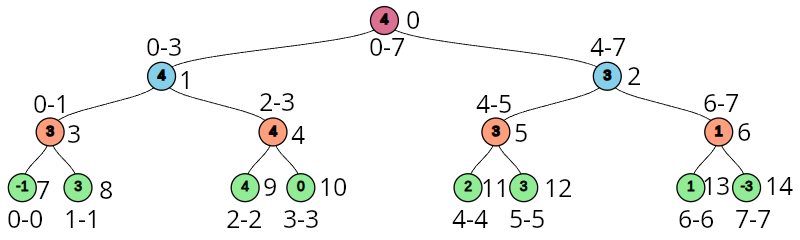
- As we can see the segment tree consists of $2n-1$ nodes where $n$ is the size of the original array.
- The first node contains the result of the index range $(0$ to $7)$.
    - Taking &nbsp; `mid = (0+7) // 2`.
    - The left child contains the result of the index range $(0$ to mid$)$
    - The left child contains the result of the index range $($mid$+1$ to $7)$
- The position of the left and right child in the segment tree array is $(2n+1)$ and $(2n+2)$ respectively, where $n$ is the position of the parent.
## Querying the Segment Tree
There are 3 conditions:
1. **Complete overlap:** The range for which we need to find the answer completely overlaps the range of the current node. In this case we return the value of the node.
2. **Partial overlap:** The given range partially overlaps the current node. In this case we check both the left and right child of the current node until we find a node whose range is completely overlapped by the given range. 
3. **No overlap:** In this case we return a very large number (if min query) or a very small number (if max query).
***
# Defining the segment tree class

In [1]:
from typing import List

class SegmentTree:
    def __init__(self, data_: List[int], key_: str):
        self.key = key_
        self.data = data_
        self.tree = [0] * ((len(data_) << 1) - 1)

        self.func = None
        if key_ == 'max': self.func = max
        elif key == 'min': self.func = min
        else: raise ValueError("Invalid key function. Use 'max' or 'min'")


    def __builder(self, index_: int, start_: int, end_: int):
        if start_ == end_:
            self.tree[index_] = self.data[start_]; return

        mid, index = (start_ + end_) >> 1, (index_ << 1) + 1

        self.__builder(index, start_, mid)
        self.__builder(index + 1, mid + 1, end_)

        self.tree[index_] = self.func(
            self.tree[index], self.tree[index + 1])

    def build(self):
        self.__builder(0, 0, len(self.data) - 1)

    def __get_range_value(self, start_: int, end_: int, left_: int, right_: int, index_: int) -> int:

        # total overlap
        if start_ <= left_ and end_ >= right_:
            return self.tree[index_]

        # partial overlap
        elif (start_ <= right_ and start_ >= left_) or (end_ <= right_ and end_ >= left_):
            mid, index = (left_ + right_) >> 1, (index_ << 1) + 1
            left_child = self.__get_range_value(start_, end_, left_, mid, index)
            right_child = self.__get_range_value(start_, end_, mid + 1, right_, index + 1)
            return self.func(left_child, right_child)

        # no overlap
        else: return -10 ** 6 if self.key == 'max' else 10 ** 6

    def get_value_from_range(self, start_: int, end_: int) -> int:
        if start_ < 0 or end_ >= len(self.data) or start_ > end_:
            raise ValueError("Invalid range")
        return self.__get_range_value(start_, end_, 0, len(self.data) - 1, 0)

# Driver code

In [2]:
data = [-1, 3, 4, 0, 2, 3, 1, -3]
segment_tree = SegmentTree(data, 'max')
segment_tree.build()

In [3]:
print("Initial Segment Tree:"); print(segment_tree.tree)

Initial Segment Tree:
[4, 4, 3, 3, 4, 3, 1, -1, 3, 4, 0, 2, 3, 1, -3]


In [4]:
queries = [(0, 0), (1, 3), (4, 7)]

for query in queries:
    l, r = query
    print(f"Max of range ({l}, {r}): {segment_tree.get_value_from_range(l, r)}")

Max of range (0, 0): -1
Max of range (1, 3): 4
Max of range (4, 7): 3


***